In [1]:
from matplotlib import font_manager, rc

font_path = '/Windows/Fonts/HANBatang.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

#print(res.text)

soup = bs4.BeautifulSoup(res.text)
#print(soup)
#data = soup.select('a')
data = soup.find_all('a') # find: 처음 것 한개만, find_all: 속한 것 모두
#print(data)


In [3]:
# 딕셔너리. url, html
category_url = {
    '메인': ['https://news.daum.net/'],
    '사회': ['https://news.daum.net/society'],
    '정치': ['https://news.daum.net/politics'],
    '경제': ['https://news.daum.net/economic'],
    '국제': ['https://news.daum.net/foreign'],
    '문화': ['https://news.daum.net/culture'],
    'IT': ['https://news.daum.net/digital']
}

In [4]:
for i, j in category_url.items() :
    res = requests.get(j[0])
    j.append(res.text)

In [6]:
#print(category_url['문화'])

In [7]:
temp = []

for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    
    for n in soup.find_all('span', attrs={'class':'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class':'info_thumb'}) :
        if n.find('a') == None :
            
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0]) # 뒤에 오는 공백 제거
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt']) # text 없이 이미지인 경우
            else :
                temp.append(n.text.strip())
                

In [8]:
print(temp)

['사회', '국제', '사회', '경제', '사회', '정치', '정치', '사회', '경제', '국제', '정치', '사회', '정치', '국제', '정치', '사회', '사회', '사회', '사회', '정치', '머니투데이', '한국경제', '뉴시스', '헤럴드경제', '노컷뉴스', '서울신문', 'YTN', '뉴스1', '뉴시스', '뉴시스', '국제신문', '전주MBC', '문화일보', '연합뉴스', '뉴스1', '뉴스1', '강원도민일보', '조선비즈', '연합뉴스', '연합뉴스', '문화일보', 'JIBS', '문화일보', '한국일보', 'YTN', '서울신문', 'YTN', '연합뉴스TV', 'MBC', 'KBS', '한겨레', '경향신문', 'SBS', '뉴스1', 'MBC', '연합뉴스', '데일리안', '연합뉴스', '이데일리', '뉴시스', '한국일보', '한겨레', 'YTN', '한국경제', '뉴시스', 'JIBS', '매일경제', '뉴스1', '데일리안', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '전주MBC', '헤럴드경제', '헤럴드경제', '아시아경제', '헤럴드경제', '뉴시스', '뉴스1', '뉴시스', 'KBS', '뉴시스', 'SBS Biz', 'SBS Biz', 'JIBS', '뉴시스', '연합뉴스', '국제신문', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '프레시안', 'YTN', '한겨레', '한겨레', '조선일보', '연합뉴스', '한겨레', '아시아경제', '서울신문', '뉴스1', '뉴시스', '연합뉴스', '문화일보', '세계일보', '뉴시스', '노컷뉴스', '연합뉴스', '연합뉴스', '뉴시스', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', 'JTBC', 'SBS Biz', 'KBS', '오마이뉴스', '여성동아', '뉴시스', '

In [10]:
#print(category_url['IT'])

In [12]:
# 신문사별 추출
temp_a = []

soup = bs4.BeautifulSoup(category_url['IT'][1])
for i in soup.find_all('span', attrs={'class':'info_thumb'}) :
    if i.find('a') == None :
        print(i.text.strip())
        temp_a.append(i.text.strip())
        
print(temp_a)

헤럴드경제
한겨레
뉴시스
뉴스1
머니투데이
뉴시스
아이뉴스24
한국경제
조선비즈
조선일보
전자신문
한국경제
이데일리
아이뉴스24
전자신문
['헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


In [13]:
# 메인에서 span 찾아 반복하며 해당되는 값을 temp에 넣어줌
for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    # 언론사 리스트
    temp = []
    
    for n in soup.find_all('span', attrs={'class':'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class':'info_thumb'}) :
        if n.find('a') == None :
            
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt'])
            else :
                temp.append(n.text.strip())
                
    j.append(temp)

In [14]:
print(category_url['IT'][2])

['연합뉴스', '연합뉴스', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아', '헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


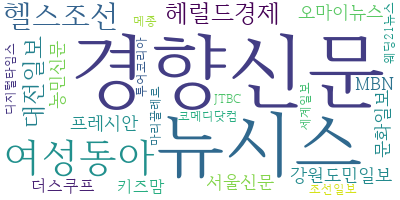

In [24]:
import wordcloud

text = ' '.join(category_url['문화'][2])
#print(text)
wc = wordcloud.WordCloud(font_path=font_path, background_color='white')
wc.generate_from_text(text)
wc.to_image()

In [25]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

In [27]:
# 모든 언론사 리스트(중복X)
data = []

for i, j in category_url.items() :
    if i != '메인':
        data.extend(j[2])
    
unique_data = list(set(data))

print(unique_data)

['국제신문', '아이뉴스24', '전주MBC', '이데일리', '조선일보', 'MBC', '아시아경제', '대전일보', '노컷뉴스', '뉴스1', '프레시안', 'MBN', 'KBS', '머니투데이', '데일리안', '조선비즈', '강원도민일보', '헤럴드경제', '연합뉴스TV', '매일경제', '여성동아', '디지털타임스', 'SBS', '세계일보', 'JTBC', '한겨레', '웨딩21뉴스', '마리끌레르', '헬스조선', '서울신문', '키즈맘', '코메디닷컴', '메종', '오마이뉴스', 'JIBS', '시사IN', '문화일보', '농민신문', '경향신문', 'SBS Biz', '한국경제', '투어코리아', '전자신문', '한국일보', '채널A', '비즈니스워치', '연합뉴스', '뉴시스', 'YTN', 'kbc광주방송', '지디넷코리아', '더스쿠프', '서울경제', '한국경제TV']


In [29]:
# 분야별 랭크
rank = {}

for i in unique_data :
    rank[i] = 0
    
for i in category_url['IT'][2] :
    rank[i] += 1
    
print(rank)

{'국제신문': 0, '아이뉴스24': 3, '전주MBC': 0, '이데일리': 1, '조선일보': 1, 'MBC': 0, '아시아경제': 0, '대전일보': 0, '노컷뉴스': 0, '뉴스1': 2, '프레시안': 0, 'MBN': 0, 'KBS': 0, '머니투데이': 2, '데일리안': 0, '조선비즈': 2, '강원도민일보': 0, '헤럴드경제': 1, '연합뉴스TV': 0, '매일경제': 0, '여성동아': 0, '디지털타임스': 0, 'SBS': 0, '세계일보': 0, 'JTBC': 0, '한겨레': 1, '웨딩21뉴스': 0, '마리끌레르': 0, '헬스조선': 0, '서울신문': 0, '키즈맘': 0, '코메디닷컴': 0, '메종': 0, '오마이뉴스': 0, 'JIBS': 0, '시사IN': 0, '문화일보': 0, '농민신문': 0, '경향신문': 0, 'SBS Biz': 0, '한국경제': 2, '투어코리아': 0, '전자신문': 2, '한국일보': 0, '채널A': 0, '비즈니스워치': 1, '연합뉴스': 2, '뉴시스': 2, 'YTN': 0, 'kbc광주방송': 0, '지디넷코리아': 3, '더스쿠프': 0, '서울경제': 0, '한국경제TV': 0}


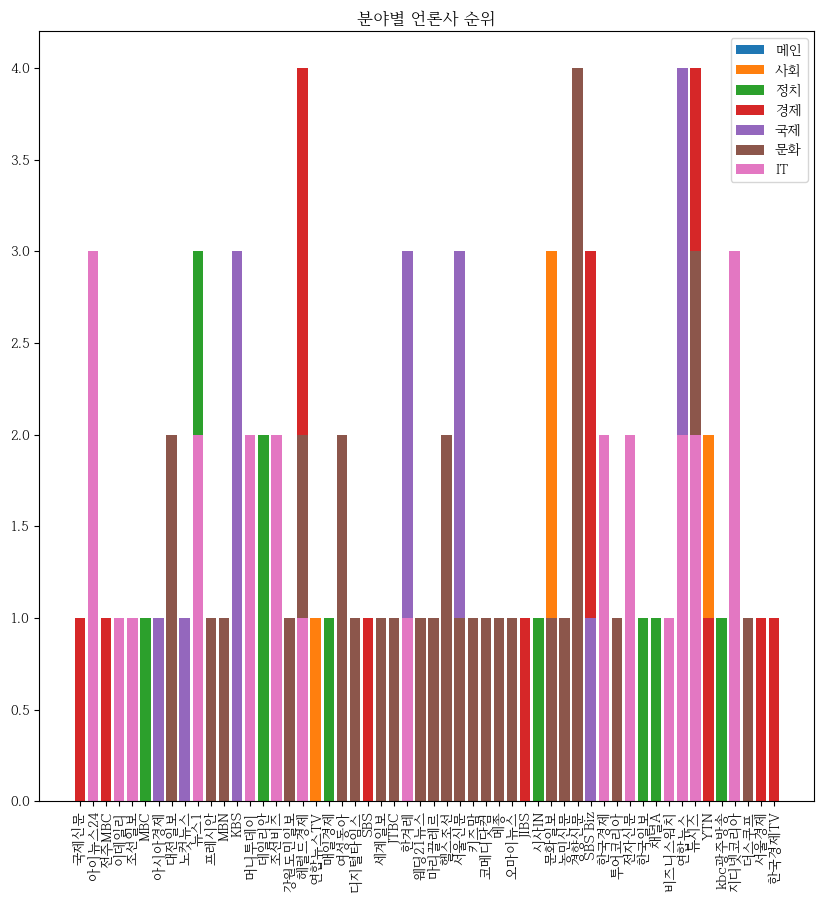

In [37]:
# 시각화
import matplotlib.pyplot as plt

rank = {}

plt.figure(figsize=(10, 10))

for i in category_url.keys() :
    
    rank = {}
    
    for j in unique_data : # j = key
        rank[j] = 0
    
    for j in category_url[i][2] :
        if i == '메인' :
            continue
        rank[j] += 1
        
    x = rank.keys()
    y = rank.values()
    plt.bar(x, y, label=i)
    
plt.xticks(rotation=90)
plt.legend()
plt.title('분야별 언론사 순위')
plt.show()


In [38]:
# 전체 데이터
print(data)

['뉴시스', '뉴시스', '국제신문', '전주MBC', '문화일보', '연합뉴스', '뉴스1', '뉴스1', '강원도민일보', '조선비즈', '연합뉴스', '연합뉴스', '문화일보', 'JIBS', '문화일보', '한국일보', 'YTN', '서울신문', 'YTN', '연합뉴스TV', 'MBC', 'KBS', '한겨레', '경향신문', 'SBS', '뉴스1', 'MBC', '연합뉴스', '데일리안', '연합뉴스', '이데일리', '뉴시스', '한국일보', '한겨레', 'YTN', '한국경제', '뉴시스', 'JIBS', '매일경제', '뉴스1', '데일리안', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '전주MBC', '헤럴드경제', '헤럴드경제', '아시아경제', '헤럴드경제', '뉴시스', '뉴스1', '뉴시스', 'KBS', '뉴시스', 'SBS Biz', 'SBS Biz', 'JIBS', '뉴시스', '연합뉴스', '국제신문', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '프레시안', 'YTN', '한겨레', '한겨레', '조선일보', '연합뉴스', '한겨레', '아시아경제', '서울신문', '뉴스1', '뉴시스', '연합뉴스', '문화일보', '세계일보', '뉴시스', '노컷뉴스', '연합뉴스', '연합뉴스', '뉴시스', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', 'JTBC', 'SBS Biz', 'KBS', '오마이뉴스', '여성동아', '뉴시스', 'MBN', '서울신문', '뉴시스', '뉴시스', '헬스조선', '강원도민일보', '프레시안', '경향신문', '농민신문', '헤럴드경제', '문화일보', '더스쿠프', '헤럴드경제', '키즈맘', '헬스조선', '코메디닷컴', '웨딩21뉴스', '여성동아', '메종', '투어코리아', '마리끌레르', 'JTBC', '대전일보

In [39]:
# 전체 랭킹
rank = {}

for i in data :
    if rank.get(i) == None :
        rank[i] = 1
    else :
        rank[i] += 1
        
print(rank)

{'뉴시스': 16, '국제신문': 2, '전주MBC': 2, '문화일보': 5, '연합뉴스': 12, '뉴스1': 9, '강원도민일보': 2, '조선비즈': 3, 'JIBS': 3, '한국일보': 2, 'YTN': 4, '서울신문': 6, '연합뉴스TV': 1, 'MBC': 2, 'KBS': 6, '한겨레': 6, '경향신문': 5, 'SBS': 3, '데일리안': 2, '이데일리': 2, '한국경제': 4, '매일경제': 1, 'kbc광주방송': 1, '시사IN': 1, '오마이뉴스': 3, 'MBN': 2, '채널A': 1, '헤럴드경제': 7, '아시아경제': 2, 'SBS Biz': 4, 'JTBC': 3, '한국경제TV': 1, '서울경제': 1, '프레시안': 2, '조선일보': 3, '세계일보': 2, '노컷뉴스': 1, '여성동아': 2, '헬스조선': 2, '농민신문': 1, '더스쿠프': 1, '키즈맘': 1, '코메디닷컴': 1, '웨딩21뉴스': 1, '메종': 1, '투어코리아': 1, '마리끌레르': 1, '대전일보': 2, '디지털타임스': 1, '비즈니스워치': 1, '지디넷코리아': 3, '머니투데이': 2, '아이뉴스24': 3, '전자신문': 2}


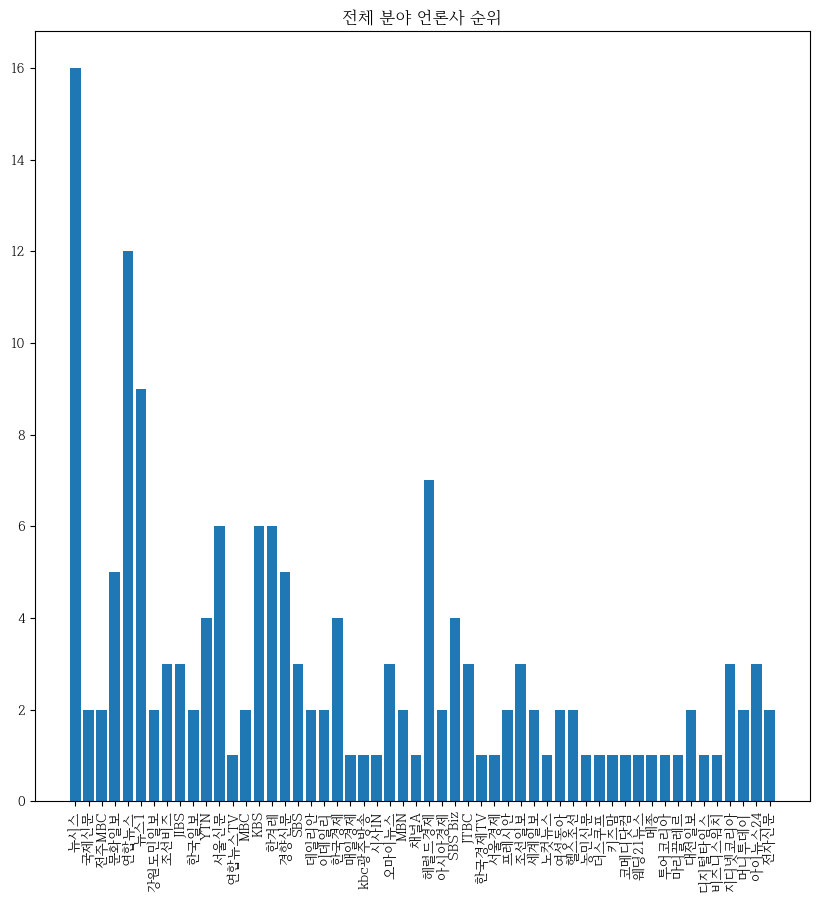

In [40]:
plt.figure(figsize=(10, 10))

x = rank.keys()
y = rank.values()

plt.bar(x, y)

plt.xticks(rotation=90)
plt.title('전체 분야 언론사 순위')
plt.show()

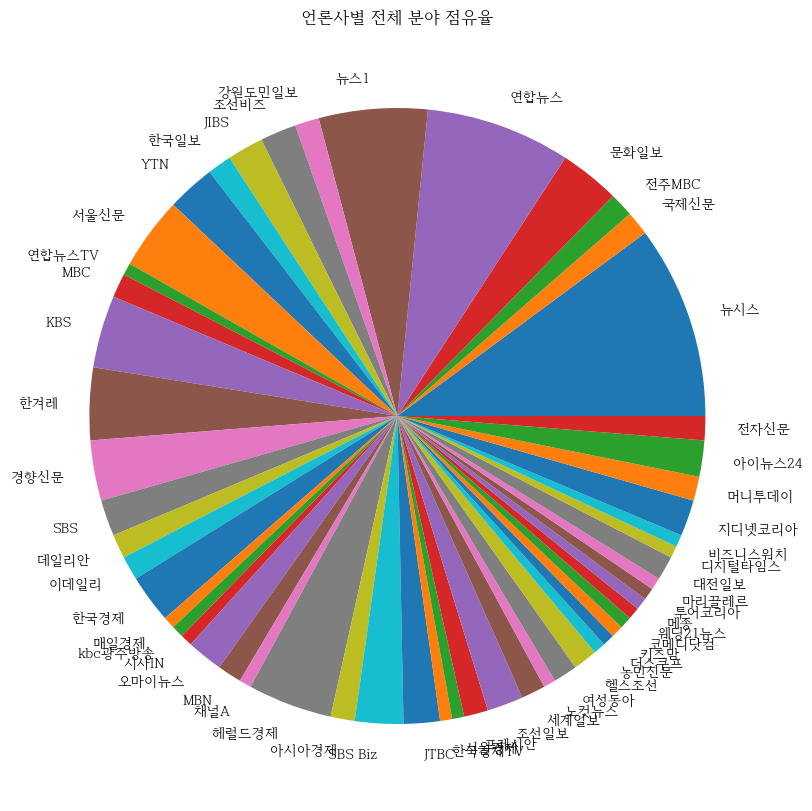

In [43]:
plt.figure(figsize=(10, 10))

x = rank.keys()
y = rank.values()

plt.pie(y, labels=x)

plt.title('언론사별 전체 분야 점유율')
plt.show()